In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [2]:
movies=pd.read_csv("movies.csv")
movies.head()

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


In [3]:
rating=pd.read_csv("ratings.csv")
rating.head()

,userId,movieId,rating,timestamp
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931


In [4]:
movie_null=movies.isnull().sum()
movie_null

movieId    0
title      0
genres     0
dtype: int64

In [5]:
rating_null=rating.isnull().sum()
rating_null.head()

userId       0
movieId      0
rating       0
timestamp    0
dtype: int64

In [6]:
unique_users=pd.value_counts(rating['userId'])            
unique_users

414    2698
599    2478
474    2108
448    1864
274    1346
       ... 
406      20
595      20
569      20
431      20
442      20
Name: userId, Length: 610, dtype: int64

In [7]:
unique_movies=pd.value_counts(rating["movieId"])
unique_movies

356       329
318       317
296       307
593       279
2571      278
         ... 
5986        1
100304      1
34800       1
83976       1
8196        1
Name: movieId, Length: 9724, dtype: int64

In [8]:
unique_rating=pd.value_counts(rating["rating"])
unique_rating

4.0    26818
3.0    20047
5.0    13211
3.5    13136
4.5     8551
2.0     7551
2.5     5550
1.0     2811
1.5     1791
0.5     1370
Name: rating, dtype: int64

In [9]:
df=pd.merge(movies,rating, on="movieId")
df.head()

,movieId,title,genres,userId,rating,timestamp
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,1,4.0,964982703
1,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,5,4.0,847434962
2,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,7,4.5,1106635946
3,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,15,2.5,1510577970
4,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,17,4.5,1305696483


In [10]:
df.groupby('title')["rating"].mean().head()

title
'71 (2014)                                 4.0
'Hellboy': The Seeds of Creation (2004)    4.0
'Round Midnight (1986)                     3.5
'Salem's Lot (2004)                        5.0
'Til There Was You (1997)                  4.0
Name: rating, dtype: float64

In [11]:
df.groupby("title")["rating"].count().sort_values(ascending=False).head()

title
Forrest Gump (1994)                 329
Shawshank Redemption, The (1994)    317
Pulp Fiction (1994)                 307
Silence of the Lambs, The (1991)    279
Matrix, The (1999)                  278
Name: rating, dtype: int64

In [12]:
mean_rating=pd.DataFrame(df.groupby("title")["rating"].mean())
mean_rating.head()

,rating
title,
'71 (2014),4.0
'Hellboy': The Seeds of Creation (2004),4.0
'Round Midnight (1986),3.5
'Salem's Lot (2004),5.0
'Til There Was You (1997),4.0


In [13]:
mean_rating["rating count"]=df.groupby("title")["rating"].count()
mean_rating.head(10)

,rating,rating count
title,,
'71 (2014),4.000000,1
'Hellboy': The Seeds of Creation (2004),4.000000,1
'Round Midnight (1986),3.500000,2
'Salem's Lot (2004),5.000000,1
'Til There Was You (1997),4.000000,2
'Tis the Season for Love (2015),1.500000,1
"'burbs, The (1989)",3.176471,17
'night Mother (1986),3.000000,1
(500) Days of Summer (2009),3.666667,42


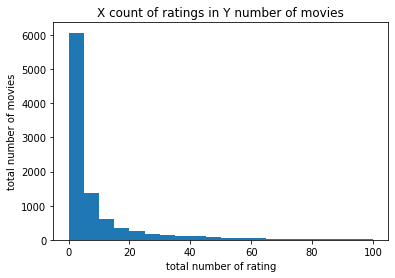

In [14]:
plt.hist(mean_rating["rating count"], bins=20,range=(0,100))
plt.xlabel("total number of rating")
plt.ylabel("total number of movies")
plt.title("X count of ratings in Y number of movies")
plt.show()

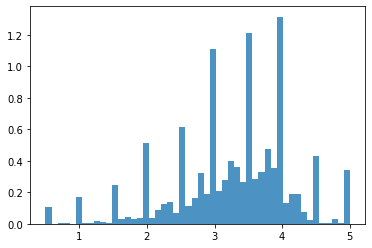

In [15]:
plt.hist(mean_rating["rating"], bins=50, density=True,alpha=0.8)
plt.show()

In [29]:
df.groupby("title")
df.head()

,movieId,title,genres,userId,rating,timestamp
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,1,4.0,964982703
1,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,5,4.0,847434962
2,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,7,4.5,1106635946
3,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,15,2.5,1510577970
4,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,17,4.5,1305696483


In [17]:
final_movie_table= df.pivot_table(index="userId", columns="title", values="rating")
final_movie_table.head()

title,'71 (2014),'Hellboy': The Seeds of Creation (2004),'Round Midnight (1986),'Salem's Lot (2004),'Til There Was You (1997),'Tis the Season for Love (2015),"'burbs, The (1989)",'night Mother (1986),(500) Days of Summer (2009),*batteries not included (1987),...,Zulu (2013),[REC] (2007),[REC]² (2009),[REC]³ 3 Génesis (2012),anohana: The Flower We Saw That Day - The Movie (2013),eXistenZ (1999),xXx (2002),xXx: State of the Union (2005),¡Three Amigos! (1986),À nous la liberté (Freedom for Us) (1931)
userId,,,,,,,,,,,,,,,,,,,,,
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.0,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [77]:
def recommend(movie_title):
    print("for movie({})".format(movie_title))
    print("Top 10 movies recommended are")
    movie_title_rating=final_movie_table["{}".format(movie_title)]
    related_movies=final_movie_table.corrwith(movie_title_rating)
    corrwith_movie= pd.DataFrame(related_movies, columns=["Correlation"])
    corrwith_movie.dropna(inplace=True)
    corrwith_movie=corrwith_movie.sort_values("Correlation", ascending=False)
    corrwith_movie=corrwith_movie.join(mean_rating["rating count"])
    print(corrwith_movie[corrwith_movie["rating count"]> 50].sort_values("Correlation", ascending=False))

In [88]:
recommend("Forrest Gump (1994)")

for movie(Forrest Gump (1994))
Top 10 movies recommended are


C:\ProgramData\Anaconda3\lib\site-packages\numpy\lib\function_base.py:2526: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar)
C:\ProgramData\Anaconda3\lib\site-packages\numpy\lib\function_base.py:2455: RuntimeWarning: divide by zero encountered in true_divide
  c *= np.true_divide(1, fact)


                                                 Correlation  rating count
title                                                                     
Forrest Gump (1994)                                 1.000000           329
Mr. Holland's Opus (1995)                           0.652144            80
Pocahontas (1995)                                   0.550118            68
Grumpier Old Men (1995)                             0.534682            52
Caddyshack (1980)                                   0.520328            52
...                                                      ...           ...
Harry Potter and the Prisoner of Azkaban (2004)    -0.131888            93
Ed Wood (1994)                                     -0.163673            70
Zoolander (2001)                                   -0.182810            54
Best in Show (2000)                                -0.241700            53
Arachnophobia (1990)                               -0.265720            53

[437 rows x 2 columns]


In [89]:
recommend("(500) Days of Summer (2009)")

for movie((500) Days of Summer (2009))
Top 10 movies recommended are


C:\ProgramData\Anaconda3\lib\site-packages\numpy\lib\function_base.py:2526: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar)
C:\ProgramData\Anaconda3\lib\site-packages\numpy\lib\function_base.py:2455: RuntimeWarning: divide by zero encountered in true_divide
  c *= np.true_divide(1, fact)


                                        Correlation  rating count
title                                                            
Star Trek II: The Wrath of Khan (1982)     0.981991            62
Piano, The (1993)                          0.944911            61
Desperado (1995)                           0.891042            66
Dances with Wolves (1990)                  0.879955           164
Crow, The (1994)                           0.857493            64
...                                             ...           ...
Vertigo (1958)                            -0.612008            60
Cool Hand Luke (1967)                     -0.614919            57
Abyss, The (1989)                         -0.750000            62
Goldfinger (1964)                         -0.799003            53
Crimson Tide (1995)                       -0.868599           103

[436 rows x 2 columns]
